In [1]:
using JSON

In [2]:
poaDictAprPM = readstring("../temp_files/PoA_dict_Apr_PM_journal.json");
poaDictAprPM = JSON.parse(poaDictAprPM);

In [3]:
poaDictAprWeekend = readstring("../temp_files/PoA_dict_Apr_weekend_journal.json");
poaDictAprWeekend = JSON.parse(poaDictAprWeekend);

In [4]:
poaDictAprPM

Dict{String,Any} with 21 entries:
  "24" => 1.66795
  "4"  => 1.75585
  "12" => 1.62308
  "20" => 1.34646
  "2"  => 1.76427
  "25" => 1.44386
  "6"  => 1.21549
  "23" => 1.53948
  "11" => 1.3032
  "13" => 1.30214
  "5"  => 1.60888
  "27" => 1.5314
  "16" => 1.67644
  "26" => 1.34687
  "17" => 1.21251
  "10" => 1.41722
  "19" => 1.73921
  "9"  => 1.23792
  "18" => 1.28076
  "30" => 1.89434
  "3"  => 1.88139

In [5]:
poaDictAprWeekend

Dict{String,Any} with 9 entries:
  "8"  => 2.00178
  "29" => 1.76935
  "1"  => 1.78943
  "21" => 1.37647
  "15" => 1.74115
  "7"  => 1.41419
  "22" => 1.91873
  "28" => 1.36469
  "14" => 1.24442

In [6]:
poaDictApr = Dict{}()

for key in keys(poaDictAprPM)
    poaDictApr[key] = poaDictAprPM[key]
end

for key in keys(poaDictAprWeekend)
    poaDictApr[key] = poaDictAprWeekend[key]
end

In [7]:
poaDictApr

Dict{Any,Any} with 30 entries:
  "24" => 1.66795
  "4"  => 1.75585
  "29" => 1.76935
  "12" => 1.62308
  "1"  => 1.78943
  "20" => 1.34646
  "2"  => 1.76427
  "25" => 1.44386
  "6"  => 1.21549
  "23" => 1.53948
  "22" => 1.91873
  "11" => 1.3032
  "13" => 1.30214
  "5"  => 1.60888
  "27" => 1.5314
  "15" => 1.74115
  "28" => 1.36469
  "16" => 1.67644
  "14" => 1.24442
  "21" => 1.37647
  "7"  => 1.41419
  "8"  => 2.00178
  "26" => 1.34687
  "17" => 1.21251
  "10" => 1.41722
  ⋮    => ⋮

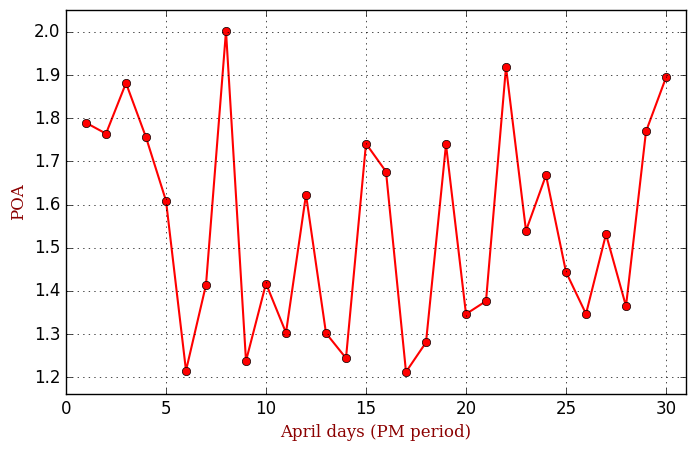

In [8]:
using PyPlot

day = 1:30

poa = map(day->poaDictApr["$(day)"], day)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(8,4.8))

plot(day, poa, "o-r", linewidth=1.5)

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0, 31)
ylim(minimum(poa)-.05, maximum(poa)+.05)

font1 = Dict("family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>12)

xlabel("April days (PM period)", fontdict=font1)
ylabel("POA", fontdict=font1)

savefig("./results/POA_Apr_journal.pdf")

In [9]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport GLS_Apr_weekday_PM_journal

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::Ptr{PyCall.PyObject_struct}) at ./deprecated.jl:770
 in transpose_f!(::Base.#transpose, ::Array{Ptr{PyCall.PyObject_struct},2}, ::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:369
 in transpose(::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:407
 in copy(::PyCall.PyArray{Ptr{PyCall.PyObject_struct},2}) at /home/jzh/.julia/v0.5/PyCall/src/numpy.jl:337
 in convert(::Type{Array{Ptr{PyCall.PyObject_struct},N}}, ::PyCall.PyObject) at /home/jzh/.julia/v0.5/PyCall/src/numpy.jl:453
 in convert(::Type{Array{PyCall.PyObject,N}}, ::PyCall.PyObject) at /home/jzh/.julia/v0.5/PyCall/src/numpy.jl:484
 in convert(::Type{PyCall.PyAny}, ::PyCall.PyObject) at /home/jzh/.julia/v0.5/PyCall/src/conversions.jl:806
 in #55 at ./<missing>:0 [inlined]
 in next at ./generator.jl:26 [inlined]
 in collect_to!(::Array{Expr,1}, ::Base.Generator{Array{Tuple{AbstractString,PyCall.PyObject},1},PyCall.##55#59}, ::Int64, ::Int64) at

In [10]:
flow_observ = GLS_Apr_weekday_PM_journal.x_

258×30 Array{Float64,2}:
 1393.18     806.378    762.959        …  1122.05    1513.32     356.411 
 1245.77    1047.31    1023.88            1058.72    1286.13     737.719 
 2175.98    1580.96    1289.54            1310.68    1660.56    1011.89  
 2206.51    1358.68    1100.85            1375.95    2022.21     856.967 
   27.0447   279.236    279.358            114.702    182.177    319.842 
  143.919    260.583    207.122        …   112.767     47.7074    93.4537
  128.953     91.0833    77.1364           105.58     127.956     72.177 
  128.953     91.0833    77.1364           105.58     127.956     72.177 
 1381.89    1661.69    1435.11            1024.77    1282.9     1395.51  
 1061.96    1922.71    1849.59             893.572    782.416   2032.03  
   85.5516   284.675    357.062        …    50.566     29.8585   369.656 
  258.077    264.587    203.507            118.433    303.162    114.442 
  322.493    399.126    250.17             333.773    473.913    174.446 
    ⋮        

In [11]:
tapSocialFlowVecDictAprPM = readstring("../temp_files/tapSocialFlowVecDict_Apr_PM_journal.json");
tapSocialFlowVecDictAprPM = JSON.parse(tapSocialFlowVecDictAprPM);

In [12]:
tapSocialFlowVecDictAprWeekend = readstring("../temp_files/tapSocialFlowVecDict_Apr_weekend_journal.json");
tapSocialFlowVecDictAprWeekend = JSON.parse(tapSocialFlowVecDictAprWeekend);

In [13]:
tapSocialFlowVecDictApr = Dict{}()

for key in keys(tapSocialFlowVecDictAprPM)
    tapSocialFlowVecDictApr[key] = tapSocialFlowVecDictAprPM[key]
end

for key in keys(tapSocialFlowVecDictAprWeekend)
    tapSocialFlowVecDictApr[key] = tapSocialFlowVecDictAprWeekend[key]
end

In [14]:
tapSocialFlowVecDictApr["1"]

258-element Array{Any,1}:
  802.283    
  682.013    
 1002.52     
 1088.85     
    0.0      
    0.0      
  819.616    
  891.126    
 2019.33     
 1537.94     
   94.3067   
    0.0424183
    0.0      
    ⋮        
   29.9638   
   20.8354   
   23.3695   
   33.4574   
   11.6199   
   24.6175   
   28.4729   
   87.2925   
   19.9269   
   27.6459   
  647.689    
  263.914    

In [15]:
flow_observ[:, 1]

258-element Array{Float64,1}:
 1393.18  
 1245.77  
 2175.98  
 2206.51  
   27.0447
  143.919 
  128.953 
  128.953 
 1381.89  
 1061.96  
   85.5516
  258.077 
  322.493 
    ⋮     
  371.823 
  371.823 
  667.477 
  667.477 
  351.144 
  351.144 
  242.947 
  196.842 
  836.25  
  836.25  
  120.94  
   84.4671

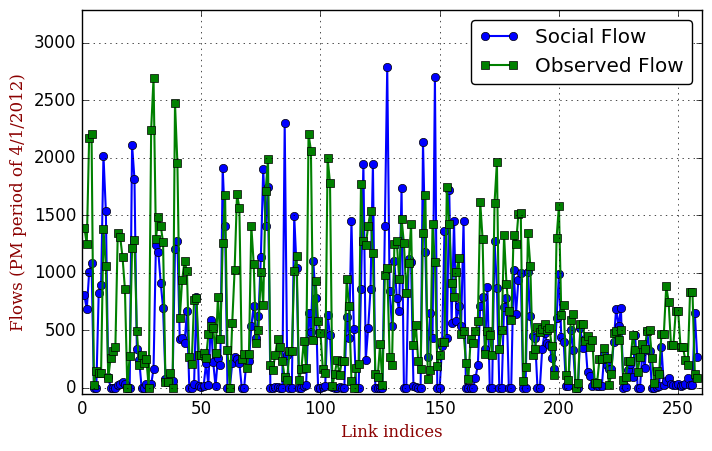

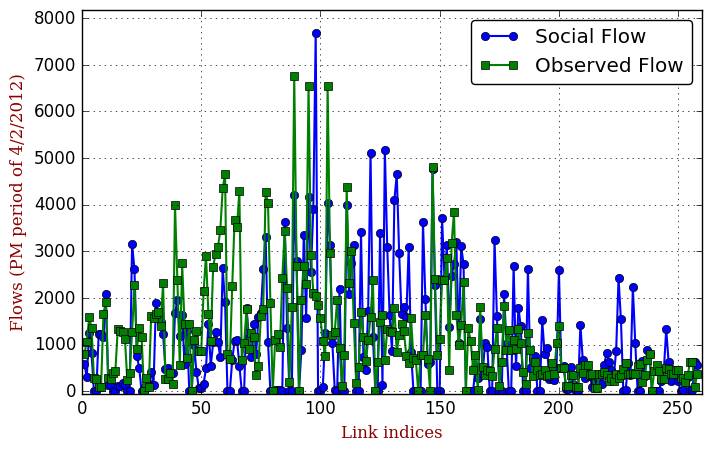

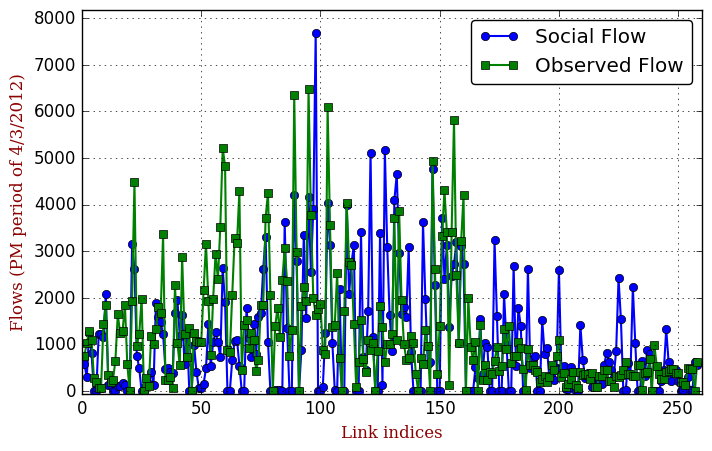

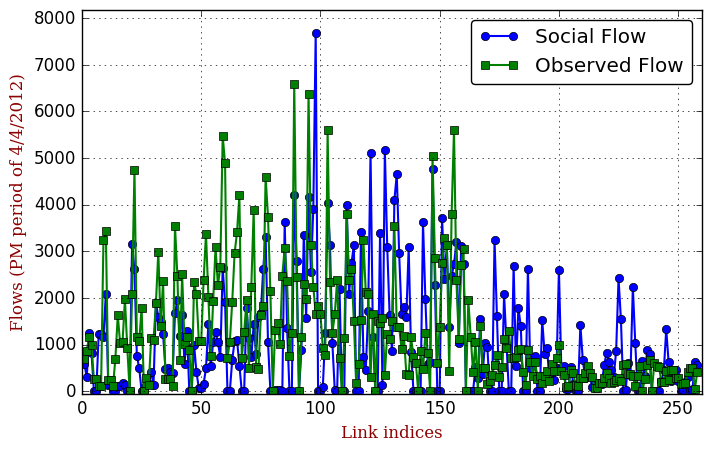

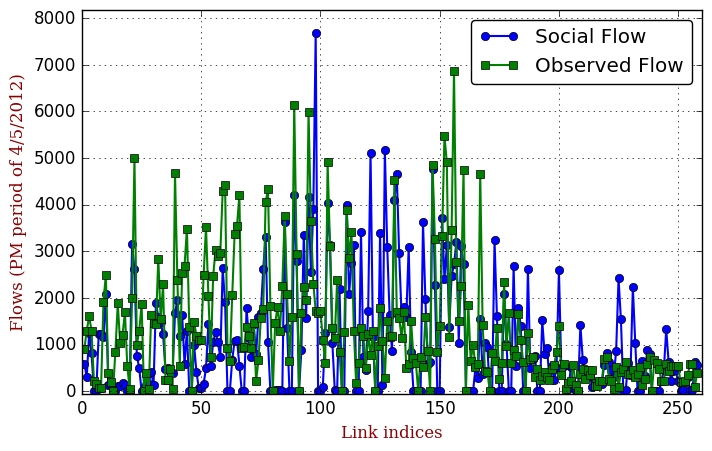

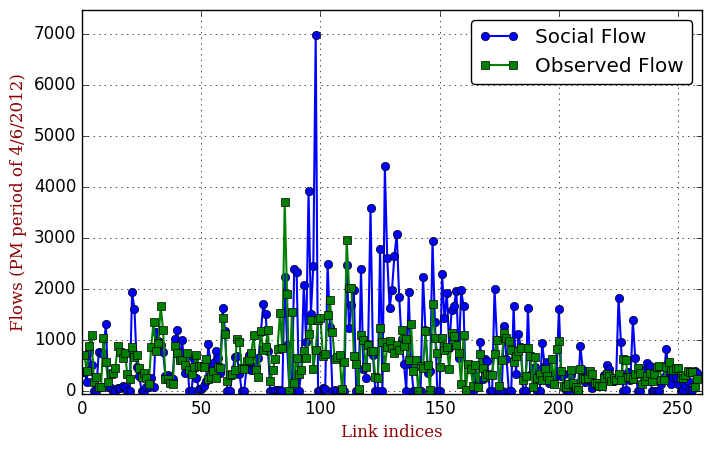

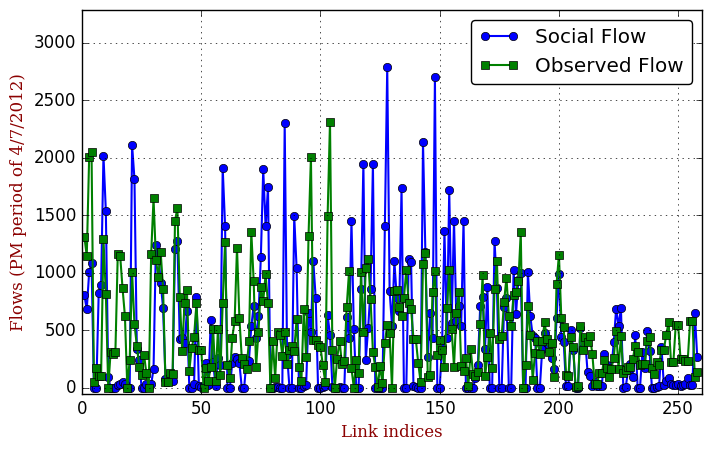

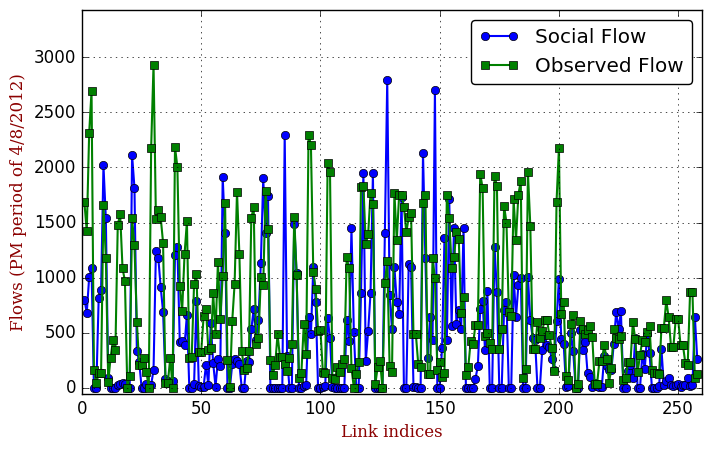

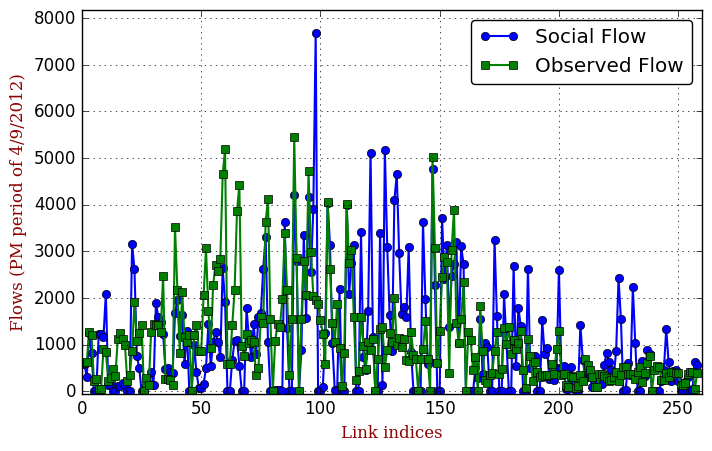

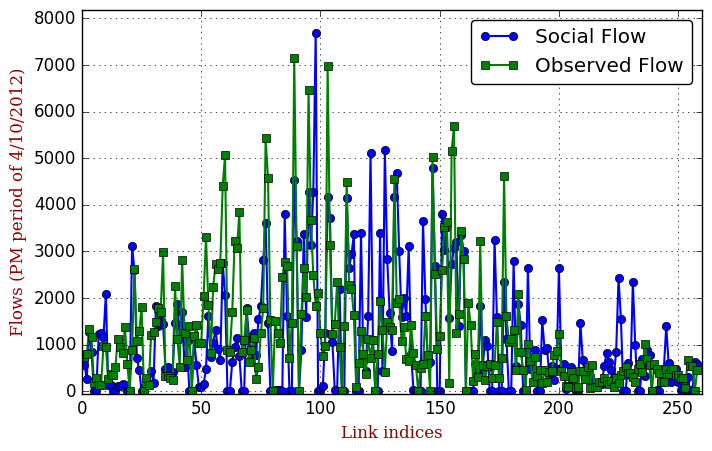

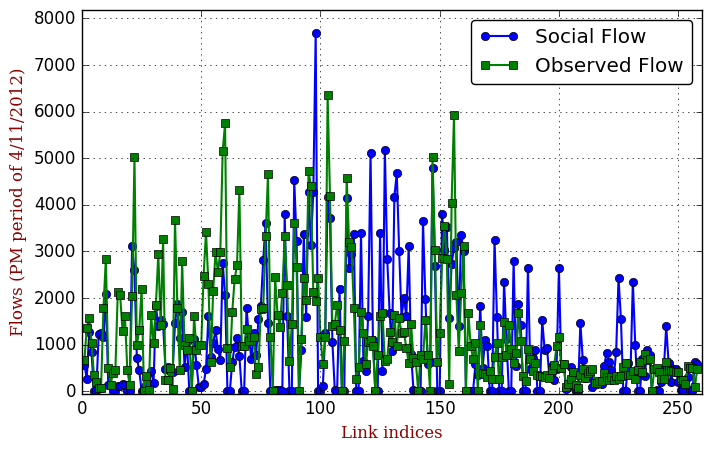

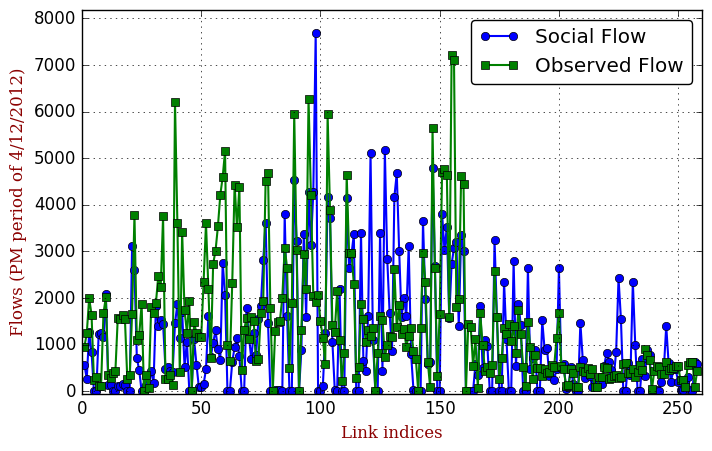

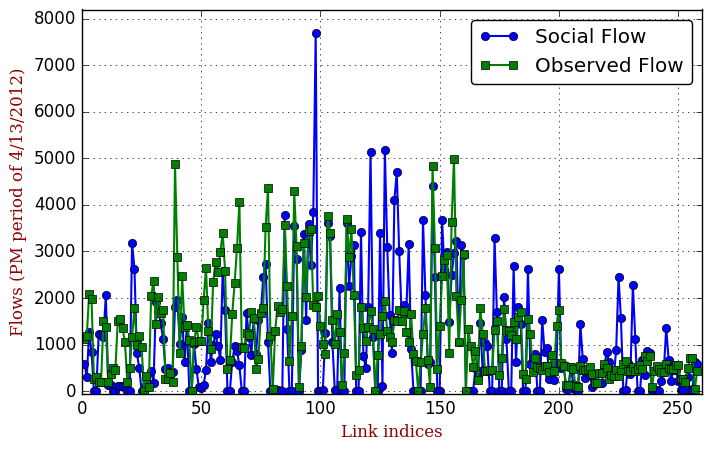

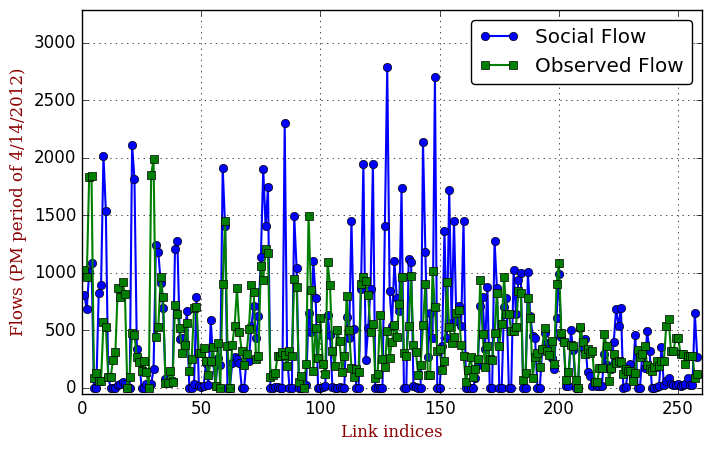

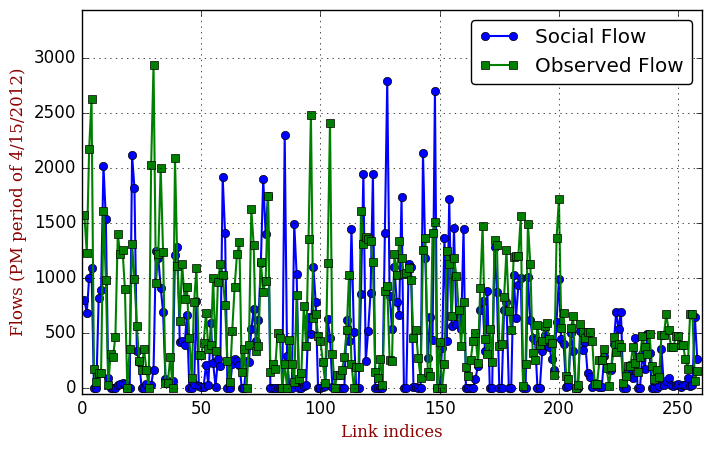

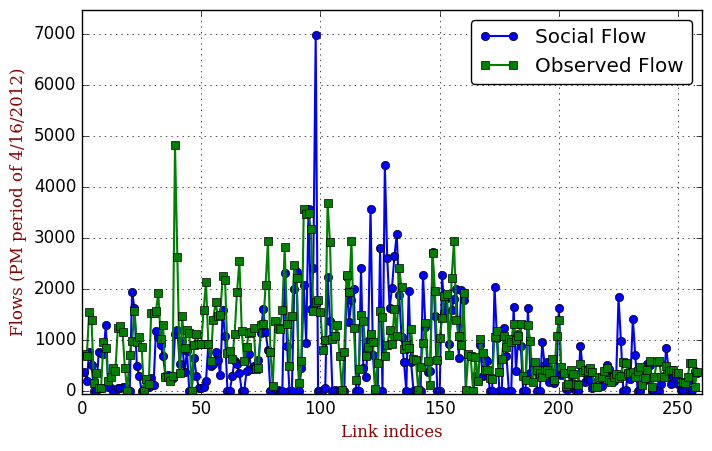

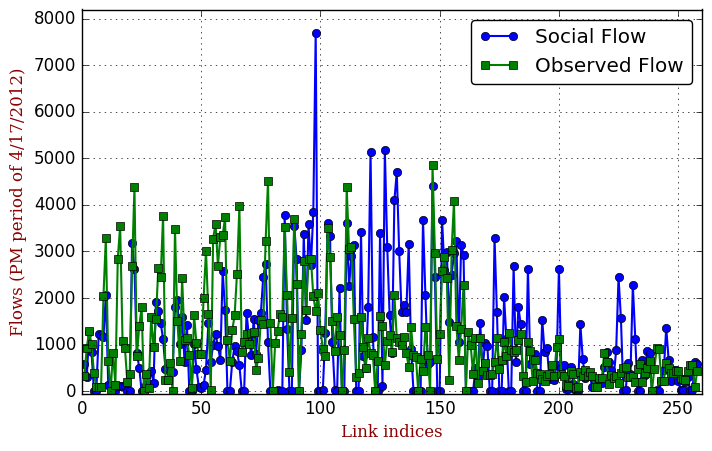

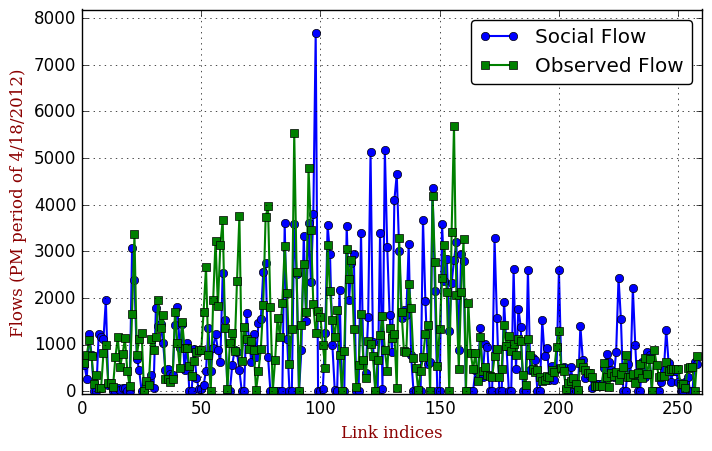

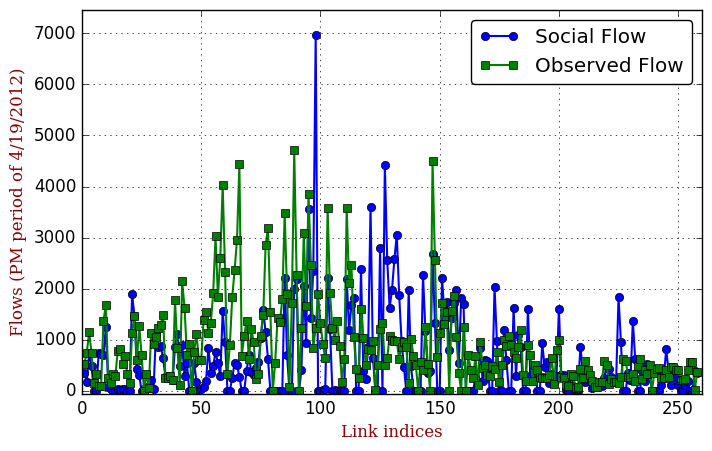

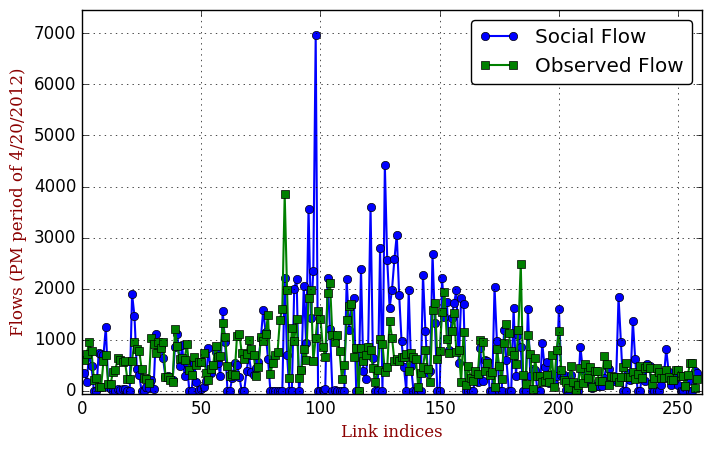

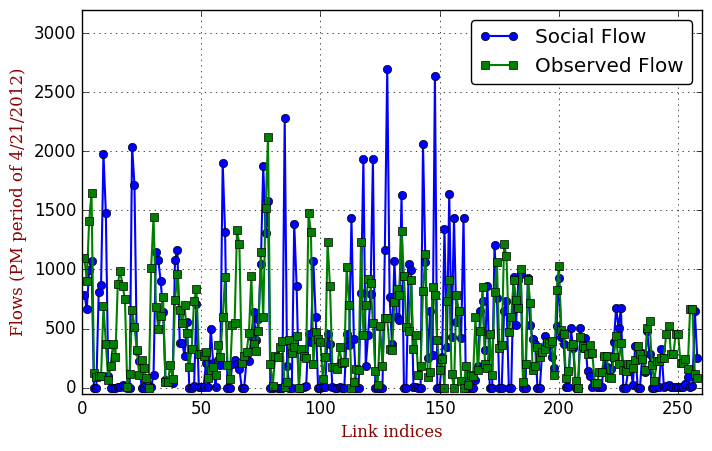

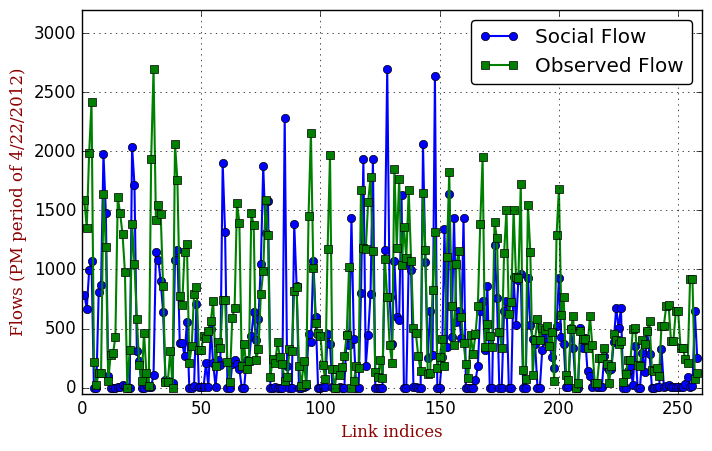

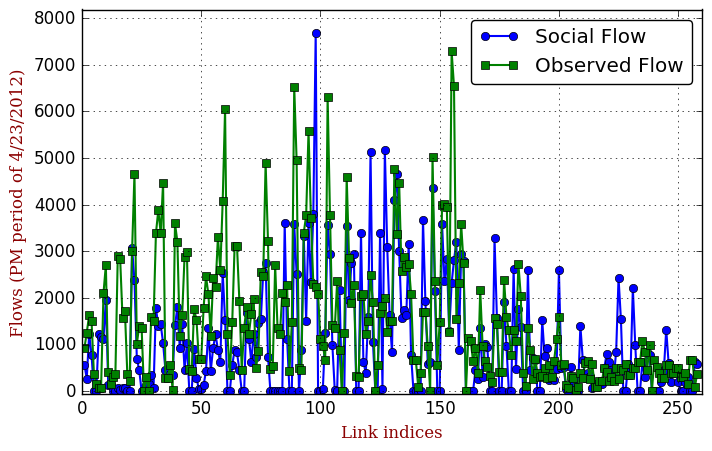

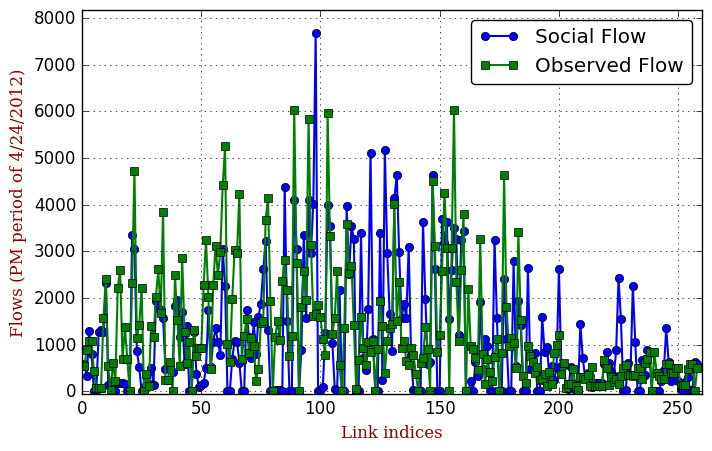

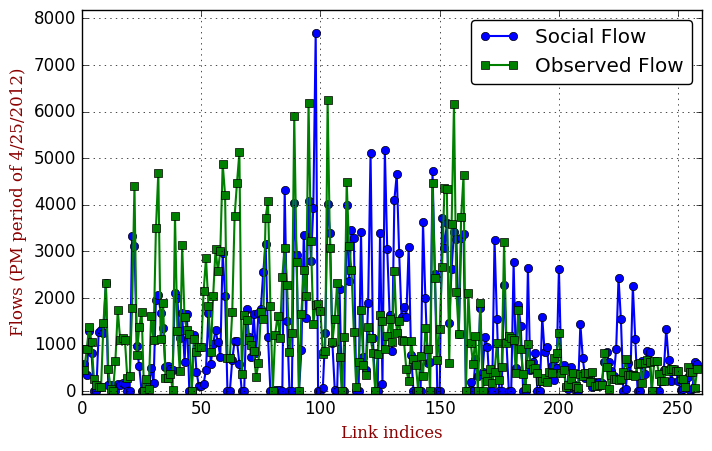

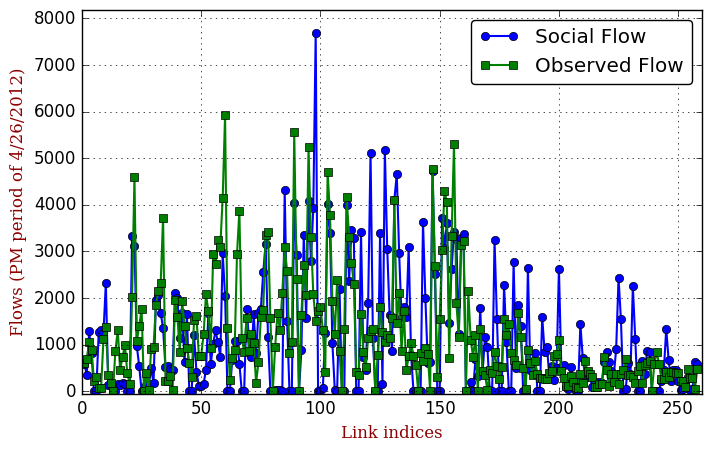

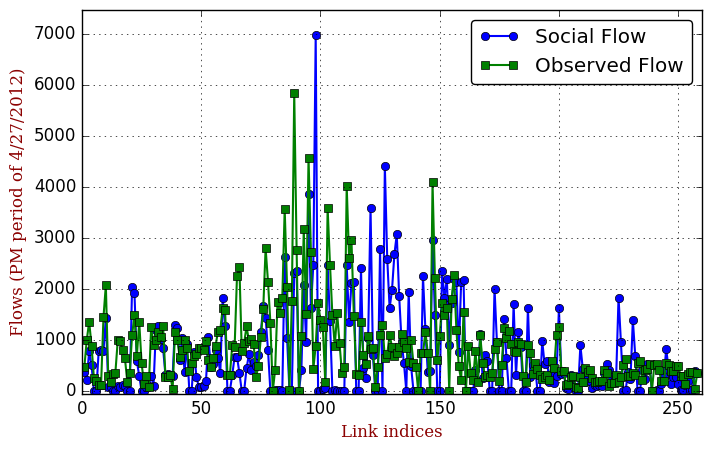

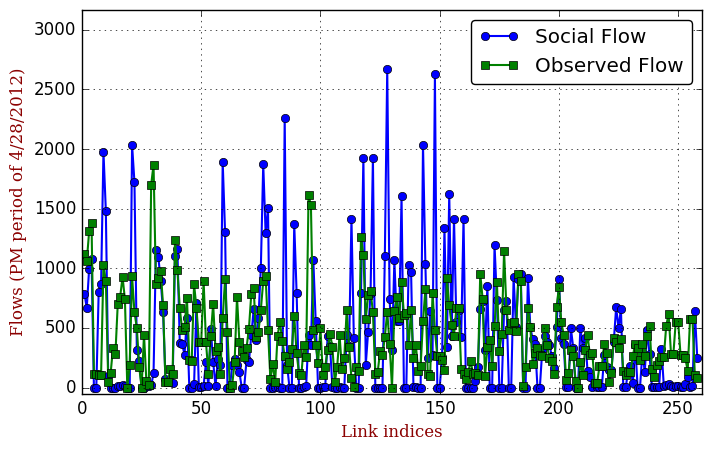

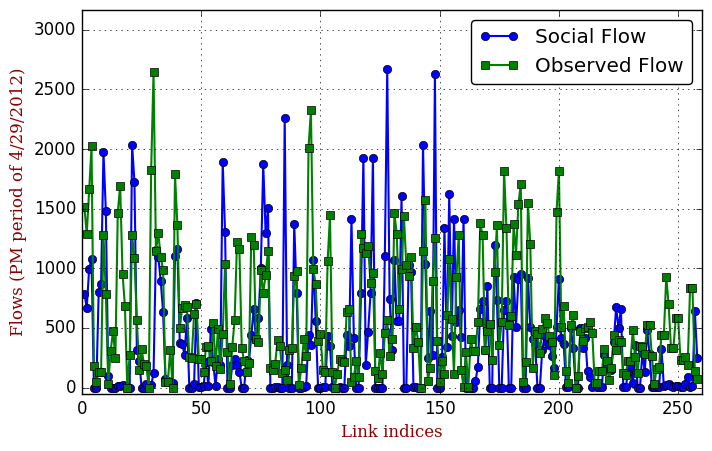

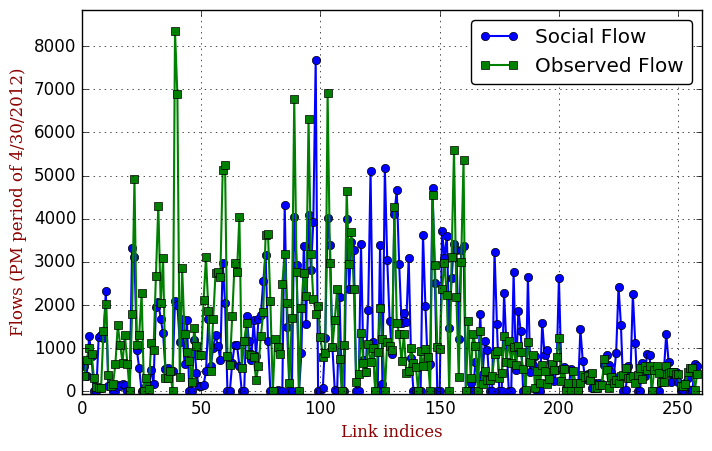

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [16]:
link_idx = 1:258

for day = 1:30

    socialFlow = map(link_idx->tapSocialFlowVecDictApr["$(day)"][link_idx], link_idx)
    observFlow = flow_observ[link_idx, day]

    # plot(iterNum, objFun, "s-g", label="True")

    fig = figure(figsize=(8,4.8))

    plot(link_idx, socialFlow, "o-b", linewidth=1.5, label="Social Flow")
    plot(link_idx, observFlow, "s-g", linewidth=1.5, label="Observed Flow")

    # legend(loc=0, fancybox="true", bbox_to_anchor=(0.1, 0)) 
    legend(loc=0, fancybox="true") 

    grid("on")

    xlim(0, 260)
#     xticks(1:30)
    ylim(-50, maximum([maximum(socialFlow), maximum(observFlow)])+500)

    font1 = Dict("family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>12)

    xlabel("Link indices", fontdict=font1)
    ylabel("Flows (PM period of 4/$(day)/2012)", fontdict=font1)

    savefig("./results/Social_observed_flows_Apr_$(day)_journal.pdf")
    
end